In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd

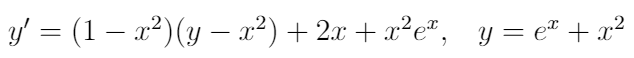

In [498]:
Y = lambda x: math.exp(x)+x**2
dY = lambda x, y: (1-x**2)*(y-x**2)+2*x+math.exp(x)*x**2
n=20
h=0.1
X=[num*h for num in range(n)]
ans=[Y(i) for i in X]

In [499]:
def RungeKuttaMethod(f, sol, x):
    y=[sol(0)]
    for i in range(n):
        k1=h*f(x[i], y[i])
        k2=h*f(x[i]+h/2, y[i]+k1/2)
        k3=h*f(x[i]+h/2, y[i]+k2/2)
        k4=h*f(x[i]+h, y[i]+k3)
        y.append(y[i]+(k1+2*k2+2*k3+k4)/6)
    return x, y[:-1]

In [500]:
def AdamsBashforthMethod(f, y, x):
    for i in range(3, n):
        y.append(y[i]+h*(55*f(x[i], y[i])-59*f(x[i-1], y[i-1])+
                    37*f(x[i-2], y[i-2])-9*f(x[i-3], y[i-3]))/24)
    return x, y[:-1]

In [501]:
res1=RungeKuttaMethod(dY, Y, X)
res2=AdamsBashforthMethod(dY, res1[1][:4], X)

In [502]:
df=pd.DataFrame({'x': X, 'Точне значення': ans, 'Метод Рунге-Кутта': res1[1], 'Метод Адамса-Башфорта': res2[1]})
df.set_index('x')

,Точне значення,Метод Рунге-Кутта,Метод Адамса-Башфорта
x,,,
0.0,1.000000,1.000000,1.000000
0.1,1.115171,1.115171,1.115171
0.2,1.261403,1.261402,1.261402
0.3,1.439859,1.439858,1.439858
0.4,1.651825,1.651823,1.651819
0.5,1.898721,1.898719,1.898710
0.6,2.182119,2.182116,2.182102
0.7,2.503753,2.503749,2.503729
0.8,2.865541,2.865537,2.865509


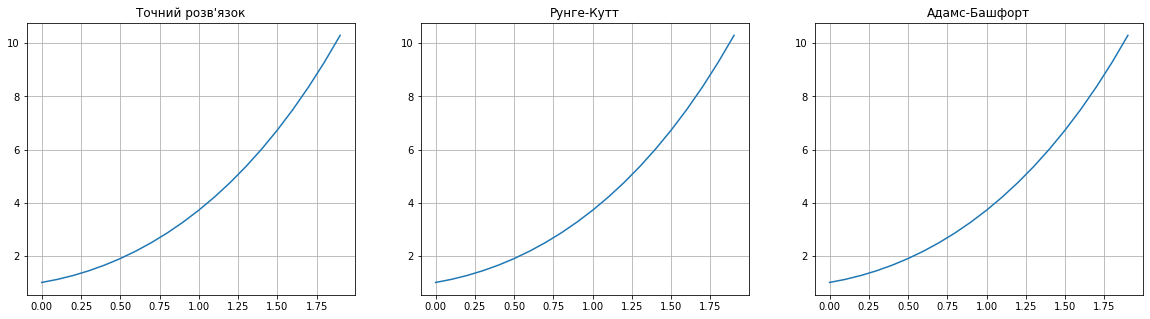

In [503]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(X, ans)
plt.title("Точний розв'язок")
plt.grid()
plt.subplot(1, 3, 2)
plt.plot(X, res1[1])
plt.title("Рунге-Кутт")
plt.grid()
plt.subplot(1, 3, 3)
plt.plot(X, res2[1])
plt.title("Адамс-Башфорт")
plt.grid()

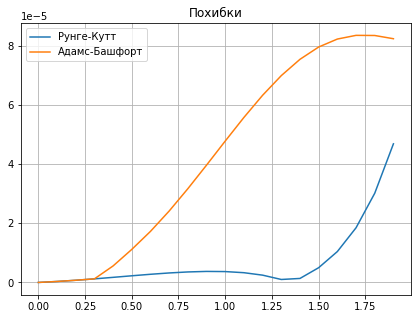

In [504]:
plt.figure(figsize=(7, 5))
plt.plot(X, [abs(ans[i]-res1[1][i]) for i in range(n)], label='Рунге-Кутт')
plt.plot(X, [abs(ans[i]-res2[1][i]) for i in range(n)], label='Адамс-Башфорт')
plt.title('Похибки')
plt.legend()
plt.grid()
plt.show()